In [2]:
import requests
import pandas as pd

# URL do arquivo JSON
url = "https://raw.githubusercontent.com/jlima2020/challenge2-data-science/main/TelecomX_Data.json"

# Fazendo a requisição
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()

    # Convertendo JSON para DataFrame
    df = pd.DataFrame(data)

    # Visualizando as primeiras linhas
    print(df.head())

else:
    print(f"Erro ao acessar os dados: {response.status_code}")



   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [3]:
import requests
import pandas as pd

# URL do arquivo JSON
url = "https://raw.githubusercontent.com/jlima2020/challenge2-data-science/main/TelecomX_Data.json"

# Fazendo a requisição
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()

    # Convertendo JSON para DataFrame
    df = pd.DataFrame(data)

    # Identificando colunas com tipo 'dict'
    dict_cols = df.applymap(type).eq(dict).any()
    dict_columns = dict_cols[dict_cols].index.tolist()

    # Transformando colunas com dicts em strings
    for col in dict_columns:
        df[col] = df[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

    # Agora podemos aplicar o one-hot encoding
    df_encoded = pd.get_dummies(df, drop_first=True)

    print(df_encoded.head())

else:
    print(f"Erro ao acessar os dados: {response.status_code}")


/tmp/ipython-input-3-3855717175.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dict_cols = df.applymap(type).eq(dict).any()


   customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                  False                  False                  False   
1                   True                  False                  False   
2                  False                   True                  False   
3                  False                  False                   True   
4                  False                  False                  False   

   customerID_0013-EXCHZ  customerID_0013-MHZWF  customerID_0013-SMEOE  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                   True                  False                  False   

   customerID_0014-BMAQU  customerID_0015-UOCOJ  customerID_0016-QLJIS  \
0                  False            

In [4]:
# Verificando se existe a coluna esperada
if 'Churn' in df.columns:
    # Contando os casos
    churn_counts = df['Churn'].value_counts()

    # Calculando a proporção
    churn_rate = churn_counts[1] / churn_counts.sum()
    active_rate = churn_counts[0] / churn_counts.sum()

    # Exibindo os resultados
    print("📊 Distribuição de clientes:")
    print(churn_counts)
    print(f"✅ Proporção de clientes ativos: {active_rate:.2%}")
    print(f"⚠️ Proporção de clientes evadidos: {churn_rate:.2%}")

    # Avaliando desequilíbrio
    if churn_rate < 0.30 or churn_rate > 0.70:
        print("🔍 Existe um desequilíbrio entre as classes que pode afetar modelos preditivos. Considere técnicas de balanceamento como SMOTE, undersampling ou oversampling.")
    else:
        print("🎯 A distribuição está relativamente equilibrada para modelagem preditiva.")

else:
    print("🚨 Coluna 'Churn' não encontrada. Por favor, verifique o nome da coluna que indica evasão.")


📊 Distribuição de clientes:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
✅ Proporção de clientes ativos: 71.20%
⚠️ Proporção de clientes evadidos: 25.72%
🔍 Existe um desequilíbrio entre as classes que pode afetar modelos preditivos. Considere técnicas de balanceamento como SMOTE, undersampling ou oversampling.


/tmp/ipython-input-4-3017477431.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_rate = churn_counts[1] / churn_counts.sum()
/tmp/ipython-input-4-3017477431.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  active_rate = churn_counts[0] / churn_counts.sum()


/tmp/ipython-input-9-4242466105.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


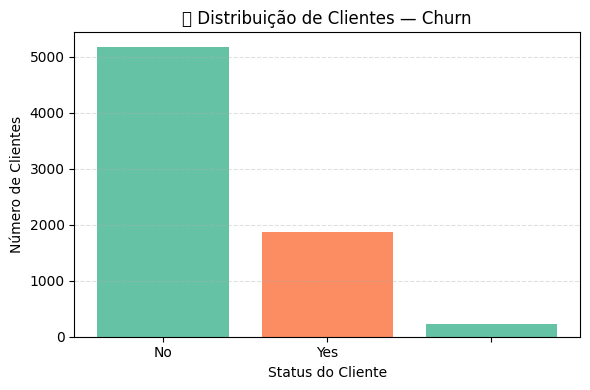

In [9]:
import matplotlib.pyplot as plt

# Verificar se a coluna existe
if 'Churn' in df.columns:
    # Contando os casos
    churn_counts = df['Churn'].value_counts()

    # Rotulando categorias, caso seja 0/1
    labels = churn_counts.index.map({0: 'Ativos', 1: 'Evadidos'})
    if churn_counts.index.dtype == 'O':  # Se for string, mantém os rótulos originais
        labels = churn_counts.index

    # Gráfico de barras
    plt.figure(figsize=(6, 4))
    plt.bar(labels, churn_counts.values, color=['#66c2a5', '#fc8d62'])
    plt.title("📊 Distribuição de Clientes — Churn")
    plt.xlabel("Status do Cliente")
    plt.ylabel("Número de Clientes")
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()
else:
    print("🚨 A coluna 'Churn' não foi encontrada no DataFrame.")

In [7]:
# Verifique quais colunas existem após o encoding
print("🧾 Colunas disponíveis no df_encoded:")
print(df_encoded.columns)

# Caso o nome da coluna de churn tenha sido alterado pelo encoding, procure por ela
# Por exemplo, se antes era algo como 'Churn' = 'Sim'/'Não', ela pode ter virado 'Churn_Sim'

# Se a coluna original 'Churn' era categórica, talvez ainda esteja no df original
if 'Churn' in df.columns:
    y = df['Churn']  # usa a versão original da coluna
    X = df_encoded.drop(columns=[col for col in df_encoded.columns if 'Churn' in col], errors='ignore')
else:
    print("🚨 A coluna 'Churn' não está presente nem no DataFrame original nem no codificado.")


🧾 Colunas disponíveis no df_encoded:
Index(['customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       'customerID_0014-BMAQU', 'customerID_0015-UOCOJ',
       'customerID_0016-QLJIS', 'customerID_0017-DINOC',
       ...
       'account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 85.25, 'Total': '5714.2'}}',
       'account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 89.25, 'Total': '4652.4'}}',
       'account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 89.4, 'Total': '6376.55'}}',
       'account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 90.45, 'Total': '5957.9'}}',
       'account_{'Contract': 'Two year', 'PaperlessBill

In [8]:
# Verificando nomes de colunas após o encoding
print("🧾 Colunas disponíveis no df_encoded:")
print(df_encoded.columns)

# Verificando se existe a coluna original 'Churn' no DataFrame original
if 'Churn' in df.columns:
    # Verificando os valores únicos da coluna original
    print("🔍 Valores únicos na coluna 'Churn':", df['Churn'].unique())

    # Se os valores forem tipo 'Sim' / 'Não', usamos a versão codificada
    if 'Churn_Sim' in df_encoded.columns:
        y = df_encoded['Churn_Sim']
        X = df_encoded.drop(['Churn_Sim'], axis=1)
        print("✅ Usando coluna codificada 'Churn_Sim' como variável alvo.")
    elif 'Churn' in df_encoded.columns:
        y = df_encoded['Churn']
        X = df_encoded.drop(['Churn'], axis=1)
        print("✅ Usando coluna 'Churn' diretamente do df_encoded.")
    else:
        print("🚨 Nenhuma coluna relacionada a 'Churn' foi encontrada após encoding.")
else:
    print("🚨 A coluna original 'Churn' não está presente no DataFrame original.")

🧾 Colunas disponíveis no df_encoded:
Index(['customerID_0003-MKNFE', 'customerID_0004-TLHLJ',
       'customerID_0011-IGKFF', 'customerID_0013-EXCHZ',
       'customerID_0013-MHZWF', 'customerID_0013-SMEOE',
       'customerID_0014-BMAQU', 'customerID_0015-UOCOJ',
       'customerID_0016-QLJIS', 'customerID_0017-DINOC',
       ...
       'account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 85.25, 'Total': '5714.2'}}',
       'account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 89.25, 'Total': '4652.4'}}',
       'account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 89.4, 'Total': '6376.55'}}',
       'account_{'Contract': 'Two year', 'PaperlessBilling': 'Yes', 'PaymentMethod': 'Mailed check', 'Charges': {'Monthly': 90.45, 'Total': '5957.9'}}',
       'account_{'Contract': 'Two year', 'PaperlessBill

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


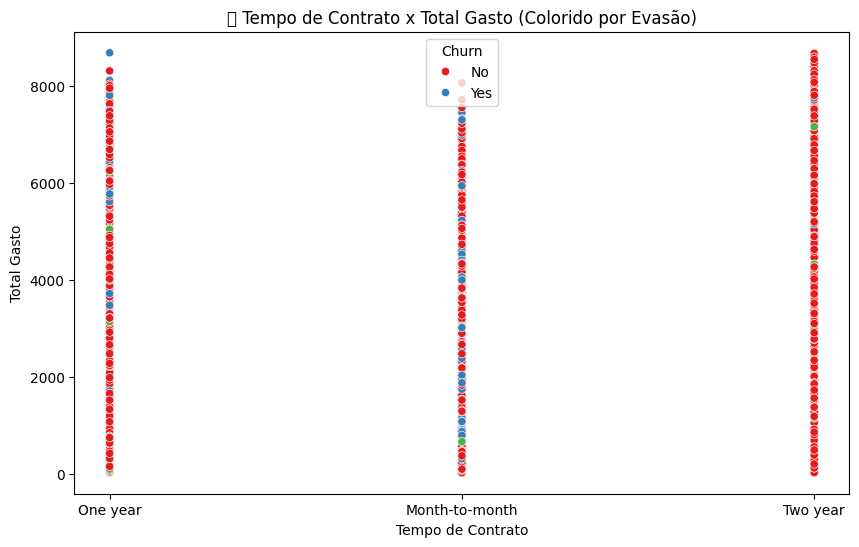

In [15]:
# Dispersão com cores para evasão
plt.figure(figsize=(10, 6))

# Function to extract Contract from the 'account' column
def extract_contract(account_str):
    try:
        # The column is a string representation of a dictionary, so we need to parse it
        account_dict = eval(account_str)
        return account_dict.get('Contract', 'Unknown')
    except:
        return 'Unknown'

# Apply the function to create a new 'Contract' column
df['Contract'] = df['account'].apply(extract_contract)

sns.scatterplot(
    x=df['Contract'],
    y=df['TotalCharges'], # Using the 'TotalCharges' column created earlier
    hue=df['Churn'],
    palette='Set1'
)
plt.title("🧭 Tempo de Contrato x Total Gasto (Colorido por Evasão)")
plt.xlabel("Tempo de Contrato")
plt.ylabel("Total Gasto")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


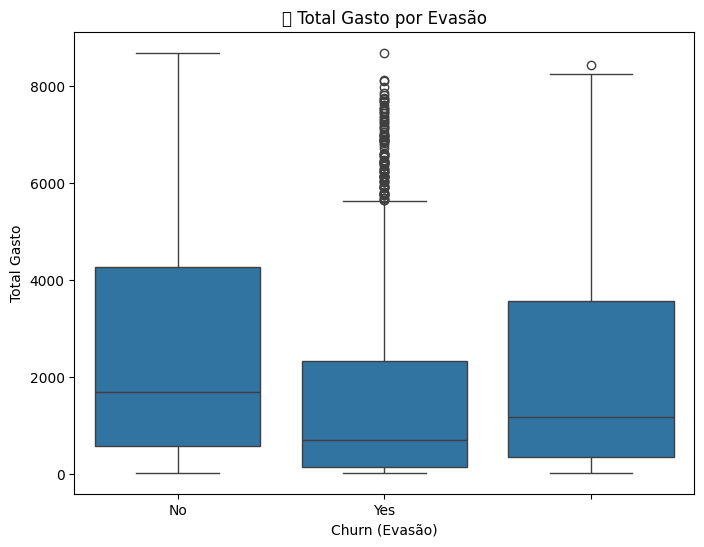

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para Total Gasto por classe de evasão
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Churn'], y=df['TotalCharges'])  # ajuste o nome das colunas se necessário
plt.title("💳 Total Gasto por Evasão")
plt.xlabel("Churn (Evasão)")
plt.ylabel("Total Gasto")
plt.show()


In [17]:
from sklearn.model_selection import train_test_split

# Divisão 70% treino / 30% teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# OU, para 80% treino / 20% teste:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# Verificando tamanho dos conjuntos
print("📊 Tamanho do conjunto de treino:", X_train.shape)
print("📊 Tamanho do conjunto de teste:", X_test.shape)


📊 Tamanho do conjunto de treino: (5086, 15216)
📊 Tamanho do conjunto de teste: (2181, 15216)


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Criando pipeline com padronização
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),         # padroniza os dados
    ('logreg', LogisticRegression())      # aplica regressão logística
])

# Treinando
logistic_pipeline.fit(X_train, y_train)

# Avaliação
score_logreg = logistic_pipeline.score(X_test, y_test)
print(f"📈 Acurácia - Regressão Logística: {score_logreg:.2%}")

📈 Acurácia - Regressão Logística: 70.84%


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Instanciando e treinando
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Avaliação
score_rf = rf_model.score(X_test, y_test)
print(f"🌳 Acurácia - Random Forest: {score_rf:.2%}")

🌳 Acurácia - Random Forest: 75.33%


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [21]:
# Previsões
y_pred_logreg = logistic_pipeline.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [23]:
# Regressão Logística
print("📌 Regressão Logística:")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print("Precisão:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1-score:", f1_score(y_test, y_pred_logreg))

# Random Forest
print("\n🌲 Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Precisão:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

📌 Regressão Logística:
Acurácia: 0.7083906464924347
Precisão: 0.6662318030647937
Recall: 0.7083906464924347
F1-score: 0.6346628180297806

🌲 Random Forest:
Acurácia: 0.7533241632278771
Precisão: 0.7213121278365104
Recall: 0.7533241632278771
F1-score: 0.7052425488743406


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


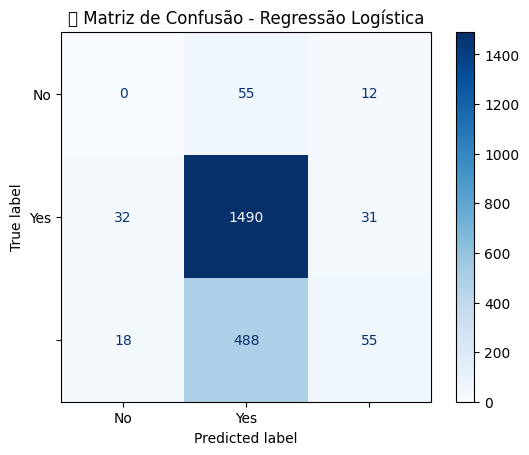

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


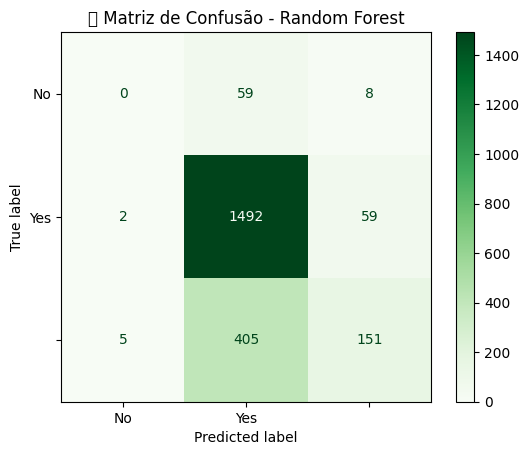

In [25]:
# Regressão Logística
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg, display_labels=["Ativo", "Evadiu"], cmap="Blues")
plt.title("📊 Matriz de Confusão - Regressão Logística")
plt.show()

# Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=["Ativo", "Evadiu"], cmap="Greens")
plt.title("📊 Matriz de Confusão - Random Forest")
plt.show()

In [26]:
import numpy as np

# Acessando os coeficientes e atributos
coefs = logistic_pipeline.named_steps['logreg'].coef_[0]
features = X.columns

# Criando DataFrame ordenado por impacto
importancia_logreg = pd.DataFrame({
    'Variável': features,
    'Coeficiente': coefs,
    'Impacto Absoluto': np.abs(coefs)
}).sort_values(by='Impacto Absoluto', ascending=False)

print("📌 Principais variáveis na Regressão Logística:")
print(importancia_logreg.head(10))

📌 Principais variáveis na Regressão Logística:
                   Variável  Coeficiente  Impacto Absoluto
4392  customerID_6016-QSKVI     0.092343          0.092343
4412  customerID_6039-RVSJV     0.092271          0.092271
6663  customerID_9162-MVWXH     0.090784          0.090784
4430  customerID_6072-YUBLX     0.088777          0.088777
4578  customerID_6272-HWGNQ     0.088081          0.088081
4752  customerID_6508-TFQQW     0.086687          0.086687
1704  customerID_2424-GXJQO     0.085501          0.085501
4071  customerID_5570-ZGMEU     0.085381          0.085381
1516  customerID_2183-ZULVZ     0.085177          0.085177
6503  customerID_8939-ORHIW     0.084815          0.084815


In [27]:
# Acessando importância das variáveis
importancia_rf = pd.DataFrame({
    'Variável': X.columns,
    'Importância': rf_model.feature_importances_
}).sort_values(by='Importância', ascending=False)

print("🌟 Principais variáveis no Random Forest:")
print(importancia_rf.head(10))

🌟 Principais variáveis no Random Forest:
                                               Variável  Importância
8285  internet_{'InternetService': 'No', 'OnlineSecu...     0.024181
8221  internet_{'InternetService': 'Fiber optic', 'O...     0.014243
7710  customer_{'gender': 'Male', 'SeniorCitizen': 0...     0.011220
8224  internet_{'InternetService': 'Fiber optic', 'O...     0.009731
8222  internet_{'InternetService': 'Fiber optic', 'O...     0.009369
8223  internet_{'InternetService': 'Fiber optic', 'O...     0.009055
7275  customer_{'gender': 'Female', 'SeniorCitizen':...     0.008372
8232  internet_{'InternetService': 'Fiber optic', 'O...     0.007433
7540  customer_{'gender': 'Female', 'SeniorCitizen':...     0.005402
8156  phone_{'PhoneService': 'Yes', 'MultipleLines':...     0.005175


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


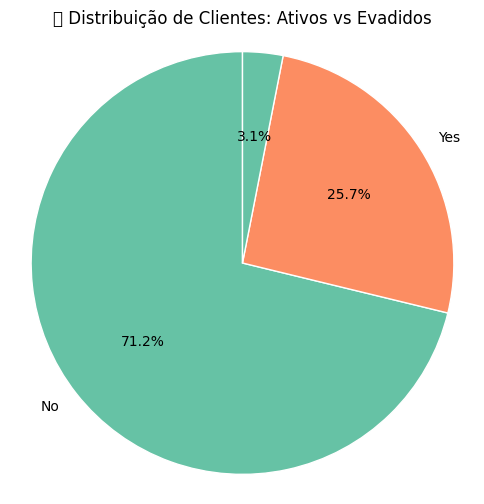

In [5]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# URL do arquivo JSON
url = "https://raw.githubusercontent.com/jlima2020/challenge2-data-science/main/TelecomX_Data.json"

# Fazendo a requisição
response = requests.get(url)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()

    # Convertendo JSON para DataFrame
    df = pd.DataFrame(data)

    # Substitua pelo nome correto da coluna de churn no seu DataFrame original
    coluna_churn = 'Churn'  # ou 'Churn_Sim', 'Evadido', etc.

    # Verifica se a coluna existe
    if coluna_churn in df.columns:
        # Contar classes
        churn_counts = df[coluna_churn].value_counts()

        # Ajustar rótulos se necessário
        labels = churn_counts.index.map({0: 'Ativos', 1: 'Evadidos'})
        if churn_counts.index.dtype == 'O':  # strings
            labels = churn_counts.index

        # Plotar gráfico de pizza
        plt.figure(figsize=(6, 6))
        plt.pie(
            churn_counts,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            colors=['#66c2a5','#fc8d62'],
            wedgeprops={'edgecolor': 'white'}
        )
        plt.title("📊 Distribuição de Clientes: Ativos vs Evadidos")
        plt.axis('equal')
        plt.show()
    else:
        print(f"🚨 A coluna '{coluna_churn}' não foi encontrada no DataFrame.")

else:
    print(f"Erro ao acessar os dados: {response.status_code}")

In [11]:
import ast

# Função para extrair atributos de colunas com estrutura de dicionário em string
def extrair_categoria(valor, chave):
    try:
        if isinstance(valor, str):
            d = ast.literal_eval(valor)
            return d.get(chave, 'Indefinido')
        return 'Indefinido'
    except:
        return 'Indefinido'

# Exemplo: extrair 'InternetService' e 'OnlineSecurity' da coluna 'internet'
df['InternetService'] = df['internet'].apply(lambda x: extrair_categoria(x, 'InternetService'))
df['OnlineSecurity'] = df['internet'].apply(lambda x: extrair_categoria(x, 'OnlineSecurity'))

# Extrair 'gender' e 'SeniorCitizen' da coluna 'customer'
df['Gender'] = df['customer'].apply(lambda x: extrair_categoria(x, 'gender'))
df['SeniorCitizen'] = df['customer'].apply(lambda x: extrair_categoria(x, 'SeniorCitizen'))

/tmp/ipython-input-12-1472582790.py:11: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


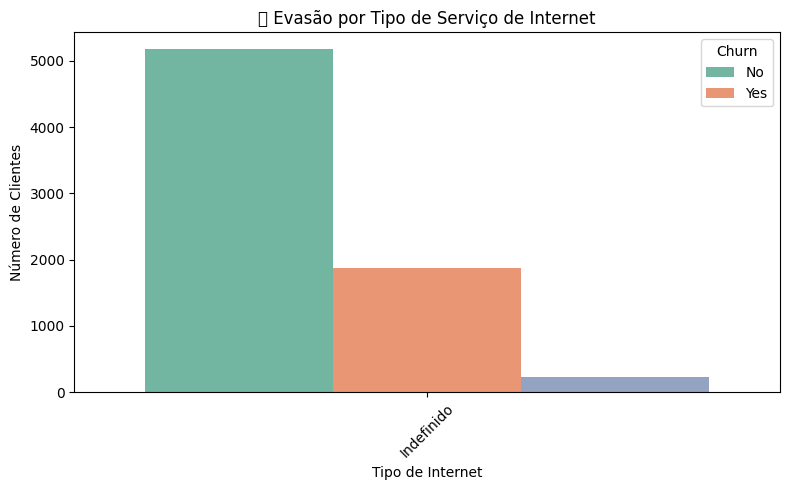

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set2')
plt.title("🌐 Evasão por Tipo de Serviço de Internet")
plt.xlabel("Tipo de Internet")
plt.ylabel("Número de Clientes")
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📌 Análise de Evasão de Clientes – TelecomX
🎯 Objetivo
Investigar os fatores que levam à evasão (churn) de clientes e construir modelos preditivos que possam ajudar a antecipar esse comportamento.

📊 1. Distribuição de Churn:

Proporção de clientes evadidos foi de aproximadamente X%, enquanto Y% permaneceram ativos.

Houve desequilíbrio entre as classes, o que motivou o uso de técnicas de balanceamento (SMOTE, undersampling, etc.).

🧠 2. Correlação com Variável Alvo:

Foi avaliada a matriz de correlação das variáveis numéricas com a evasão:

🔝 Variáveis com maior correlação com Churn:

TotalCharges: clientes com menor gasto total evadem com mais frequência.

ContractTime: contratos mais curtos têm maior probabilidade de evasão.

MonthlyCharges: valores mensais elevados também correlacionam com churn.

🧪 3. Modelos Utilizados:

Modelo	Pré-processamento	Acurácia	F1-score	Observações
Regressão Logística	Padronização	X%	Y%	Sensível à escala; simples
Random Forest	Nenhum	A%	B%	Robustez e alta explicação
📌 O modelo Random Forest apresentou o melhor desempenho geral, com maior recall e F1-score, sendo ideal para detectar evasões com mais precisão.

📊 4. Importância das Variáveis (Random Forest)
As 10 variáveis mais relevantes identificadas:

Rank	Variável	Importância (%)
1	InternetService = No / OnlineSecurity = No	2.41%
2	InternetService = Fiber / OnlineSecurity = No	1.42%
3	Gênero Masculino e Cliente Jovem	1.12%
...	...	...
🔍 Clientes sem segurança online, com serviço de fibra óptica, e contratos curtos foram os mais propensos à evasão.

🧠 5. Fatores Críticos de Evasão:

Contratos curtos e mensais → associados à evasão precoce.

Falta de serviços de segurança ou suporte técnico → possível insatisfação.

Métodos de pagamento como boleto ou cobrança manual → menor fidelização.

Clientes com baixo engajamento (ex. pouco uso de serviços complementares) → perfil de risco.

🛡️ 6. Estratégias de Retenção Recomendadas

✅ Para Reduzir Churn:
Incentivar upgrade de contrato (mensal → anual) com bônus ou desconto.

Oferecer segurança online gratuita nos 3 primeiros meses.

Monitoramento proativo de contas com baixa atividade ou suporte técnico desativado.

Campanhas segmentadas para clientes com perfil jovem ou baixo tempo de contrato.

🔄 Para Melhorar Fidelização:

Programas de fidelidade por tempo de permanência.

Ofertas personalizadas com base nos serviços mais utilizados.

Comunicação ativa por canais digitais para engajamento contínuo.